<a href="https://colab.research.google.com/github/iceman67/-Python/blob/master/kobis_boxoffices_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KOBIS 박스오피스 openAPI 사용하기 
* 일별 박스오피스 자료 요청 
* 요청자료를 그룹핑하여 관람객의 변화를 분석함
1. 일자별로 영화관람인을 집계함 
2. 요일별로 영화관람인원을 집계함 
---

(JSON 요청)

http://kobis.or.kr/kobisopenapi/homepg/apiservice/searchServiceInfo.do

In [1]:
key='01f13234167ec2fd37e0de81f8308b1f'

In [2]:
import json
import requests
import pandas as pd

In [3]:
def getBoxOffice(mDate): 
    mURL = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=dac1451451ff54f43e1f0f59d3356f86&targetDt='+ str(mDate)
    res = requests.get(mURL)
    text = res.text
    movieData = json.loads(text)
    movieLen = len(movieData['boxOfficeResult']['dailyBoxOfficeList'])
    movieDF = pd.DataFrame()
    #movieDF = movieDF.append(  {"tm":"", "title":"", "cnt":"", "salesShare": "" }, ignore_index=True, sort=False )
    for i in range(movieLen):
        movieDF.loc[i,"tm"] = str(mDate)
        movieDF.loc[i,"tm"] = pd.to_datetime(movieDF.loc[i,"tm"], infer_datetime_format=True)
        movieDF.loc[i,"title"]= movieData['boxOfficeResult']['dailyBoxOfficeList'][i]['movieNm']
        movieDF.loc[i, "cnt"] = movieData['boxOfficeResult']['dailyBoxOfficeList'][i]['salesAmt']
        movieDF.loc[i, "salesShare"] = float(movieData['boxOfficeResult']['dailyBoxOfficeList'][i]['salesShare'])
    return movieDF
    #print(movieDF.head())
    

In [4]:
movieDF = getBoxOffice(20220505)

In [6]:
movieDF.head(10)

,tm,title,cnt,salesShare
0,2022-05-05 00:00:00,닥터 스트레인지: 대혼돈의 멀티버스,11247679970,82.5
1,2022-05-05 00:00:00,배드 가이즈,1112682120,8.2
2,2022-05-05 00:00:00,극장판 엉덩이 탐정: 수플레 섬의 비밀,595200250,4.4
3,2022-05-05 00:00:00,니 부모 얼굴이 보고 싶다,215269880,1.6
4,2022-05-05 00:00:00,신비한 동물들과 덤블도어의 비밀,165884610,1.2
5,2022-05-05 00:00:00,수퍼 소닉2,71080920,0.5
6,2022-05-05 00:00:00,서울괴담,62295640,0.5
7,2022-05-05 00:00:00,토르: 마법 검의 전설,31155300,0.2
8,2022-05-05 00:00:00,우연과 상상,21844800,0.2
9,2022-05-05 00:00:00,몬스터 아카데미,16462800,0.1


In [7]:
# 기준일을 2018년 1월으로 지정한 경우임 
base= 20180100
for i in range(1,32):
    movieDF = getBoxOffice(base+i)
    movieDF.to_csv('movie'+str(base+i)+'.csv', encoding='utf-8-sig', index=False,header=False)

In [8]:
# 기준일을 2018년 2월으로 지정한 경우임 
base= 20180200
for i in range(1,29):
    movieDF = getBoxOffice(base+i)
    movieDF.to_csv('movie'+str(base+i)+'.csv', encoding='utf-8-sig', index=False,header=False)

In [9]:
import glob

total_movie=pd.DataFrame()
for infile in glob.glob("*.csv"):
    data = pd.read_csv(infile,names=['tm', 'title', 'cnt', 'salesShare', 'salesChange'],
                                     parse_dates=['tm'])
    total_movie=total_movie.append(data,ignore_index=True)

In [10]:
total_movie.head()

,tm,title,cnt,salesShare,salesChange
0,2018-01-23,그것만이 내 세상,787874300,25.8,NaN
1,2018-01-23,메이즈 러너: 데스 큐어,721009000,23.6,NaN
2,2018-01-23,코코,527130900,17.2,NaN
3,2018-01-23,신과함께-죄와 벌,367788800,12.0,NaN
4,2018-01-23,1987,371003000,12.1,NaN


In [11]:
total_movie.head()
base = 2018
total_movie.to_csv('movie'+str(base)+'.csv', encoding='utf-8-sig', index=False, header=None)

In [ ]:
total_movie.head()

,tm,title,cnt,salesShare,salesChange
0,2018-02-12,조선명탐정: 흡혈괴마의 비밀,688680700,43.8,NaN
1,2018-02-12,그것만이 내 세상,214763400,13.6,NaN
2,2018-02-12,코코,129901700,8.3,NaN
3,2018-02-12,인시디어스4: 라스트 키,91854300,5.8,NaN
4,2018-02-12,패딩턴 2,82234000,5.2,NaN


In [12]:
total_movie['weekday'] = total_movie['tm'].dt.dayofweek

In [13]:
total_movie.drop('salesChange',axis=1, inplace=True)

In [14]:
total_movie.head()

,tm,title,cnt,salesShare,weekday
0,2018-01-23,그것만이 내 세상,787874300,25.8,1
1,2018-01-23,메이즈 러너: 데스 큐어,721009000,23.6,1
2,2018-01-23,코코,527130900,17.2,1
3,2018-01-23,신과함께-죄와 벌,367788800,12.0,1
4,2018-01-23,1987,371003000,12.1,1


일별로 자료를 그룹핑함 

In [15]:
grouped = total_movie.groupby(total_movie['tm'], as_index=False).sum()

In [16]:
grouped

,tm,cnt,salesShare,weekday
0,2018-01-01,14449197900,99.0,0
1,2018-01-02,4884883600,98.5,10
2,2018-01-03,4822173800,97.9,20
3,2018-01-04,4615108000,97.6,30
4,2018-01-05,6088851197,98.4,40
5,2018-01-06,12323383098,98.7,50
6,2018-01-07,11552576900,99.0,60
7,2018-01-08,3885100900,98.4,0
8,2018-01-09,3657432700,97.9,10
9,2018-01-10,3466106700,97.5,20


In [17]:
movie_day_group = grouped[['tm', 'cnt']]

In [18]:
movie_day_group

,tm,cnt
0,2018-01-01,14449197900
1,2018-01-02,4884883600
2,2018-01-03,4822173800
3,2018-01-04,4615108000
4,2018-01-05,6088851197
5,2018-01-06,12323383098
6,2018-01-07,11552576900
7,2018-01-08,3885100900
8,2018-01-09,3657432700
9,2018-01-10,3466106700


요일별 자료그룹핑
* 월요일 = 0, 일요일 = 6 인 요일



In [19]:
grouped = total_movie.groupby(total_movie['weekday'], as_index=False).sum()

In [20]:
grouped

,weekday,cnt,salesShare
0,0,34908791350,858.5
1,1,24047845000,839.0
2,2,35356052900,863.2
3,3,31110969000,759.4
4,4,38244063739,765.5
5,5,71722289913,776.1
6,6,64565392600,776.1


<BarContainer object of 7 artists>

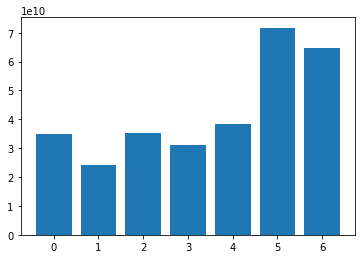

In [21]:
import matplotlib.pyplot as plt


plt.bar(grouped['weekday'], grouped['cnt'])

* 실습 2018년 8월 요일별 영화관객 분석

In [22]:
# 기준일을 2018년 8월으로 지정한 경우임 
base= 20180800
for i in range(1,32):
    movieDF = getBoxOffice(base+i)
    movieDF.to_csv('movie'+str(base+i)+'.csv', encoding='utf-8-sig', index=False,header=False)

In [23]:
import glob

total_movie=pd.DataFrame()
for infile in glob.glob("*.csv"):
    data = pd.read_csv(infile,names=['tm', 'title', 'cnt', 'salesShare', 'salesChange'],
                                     parse_dates=['tm'])
    total_movie=total_movie.append(data,ignore_index=True)

In [24]:
total_movie.head()
base = 2018
total_movie.to_csv('movie'+str(base)+'.csv', encoding='utf-8-sig', index=False, header=None)

In [25]:
total_movie.head()

,tm,title,cnt,salesShare,salesChange
0,2018-01-23,그것만이 내 세상,787874300,25.8,NaN
1,2018-01-23,메이즈 러너: 데스 큐어,721009000,23.6,NaN
2,2018-01-23,코코,527130900,17.2,NaN
3,2018-01-23,신과함께-죄와 벌,367788800,12.0,NaN
4,2018-01-23,1987,371003000,12.1,NaN


In [26]:
total_movie['weekday'] = total_movie['tm'].dt.dayofweek

In [27]:
total_movie.head()
total_movie.drop('salesChange',axis=1, inplace=True)

요일별 자료그룹핑
* 월요일 = 0, 일요일 = 6 인 요일



In [28]:
grouped = total_movie.groupby(total_movie['weekday'], as_index=False).sum()

In [29]:
grouped

,weekday,cnt,salesShare
0,0,88233380000,2108.3
1,1,66154921400,2066.5
2,2,116000460500,2215.1
3,3,92634500450,2005.1
4,4,112864138640,2020.2
5,5,196050753346,1946.3
6,6,176683341700,1946.3


<BarContainer object of 7 artists>

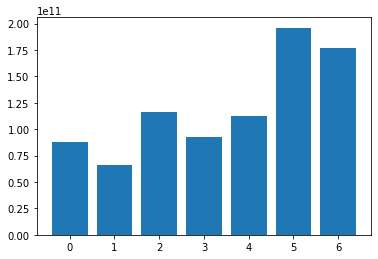

In [30]:
import matplotlib.pyplot as plt


plt.bar(grouped['weekday'], grouped['cnt'])

세부내용 살펴보기

In [ ]:
mDate=20201130
key='dac1451451ff54f43e1f0f59d3356f86'
mURL = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=dac1451451ff54f43e1f0f59d3356f86&targetDt='+ str(mDate)

In [ ]:
mURL

'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=dac1451451ff54f43e1f0f59d3356f86&targetDt=20201130'

In [ ]:
res = requests.get(mURL)
text = res.text

In [ ]:
movieData = json.loads(text)
movieLen = len(movieData['boxOfficeResult']['dailyBoxOfficeList'])
movieDF = pd.DataFrame()
movieDF = movieDF.append(  {"tm":"", "title":"", "cnt":"", "salesShare": "" }, ignore_index=True, sort=False )

In [ ]:
for i in range(movieLen):
    movieDF.loc[i,"tm"] = str(mDate)
    movieDF.loc[i,"title"]= movieData['boxOfficeResult']['dailyBoxOfficeList'][i]['movieNm']
    movieDF.loc[i, "cnt"] = float(movieData['boxOfficeResult']['dailyBoxOfficeList'][i]['salesAmt'])
    movieDF.loc[i, "salesShare"] = float(movieData['boxOfficeResult']['dailyBoxOfficeList'][i]['salesShare'])
    movieDF.loc[i, "salesChange"] = float(movieData['boxOfficeResult']['dailyBoxOfficeList'][i]['salesChange'])

In [ ]:
movieDF.head()

,cnt,salesChange,salesShare,title
0,1.68455e+08,-59.5,39.4,이웃사촌
1,7.96852e+07,-50,18.6,도굴
2,5.85883e+07,-52.4,13.7,런
3,2.7447e+07,-58.9,6.4,프리키 데스데이
4,1.54701e+07,-48.6,3.6,삼진그룹 영어토익반


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155202 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

mpl.font_manager._rebuild() 

fontpath = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
font_name = 'NanumMyeongjo'
plt.rc('font', family=font_name) 


plt.rcParams["figure.figsize"] = (20,3) 
plt.rcParams.update({'font.size': 12})
plt.title('audience' + '(' + str(mDate) +')') 
plt.bar(movieDF['title'], movieDF['salesShare'], color='b')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
 
plt.rc('font', family=font_name)
plt.rcParams["figure.figsize"] = (20,3) 
plt.rcParams.update({'font.size': 12})
plt.title('audience' + '(' + str(mDate) +')') 
plt.ylim(100000,50000000)
#plt.yscale('log')
plt.bar(movieDF['title'], movieDF['cnt'], color='b')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
 

plt.rc('font', family=font_name)
plt.rcParams["figure.figsize"] = (20,3) 
plt.rcParams.update({'font.size': 12})
plt.title('audience' + '(' + str(mDate) +')') 
plt.bar(movieDF['title'], movieDF['salesChange'], color='b')
plt.show()

In [ ]:
movieDF.to_csv('movie'+str(mDate)+'.csv', encoding='utf-8-sig', index=False)